## 난임 환자 대상 임신 성공 여부 예측

### LGAimers 6th 온라인 해커톤

Import

In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### Data Load

In [2]:
# 데이터 로드
IVF_train = pd.read_csv('../data/IVF_train_dataset_40.csv')
IVF_test = pd.read_csv('../data/IVF_test_dataset_40.csv')

In [3]:
# ID 열을 제외한 특성과 타겟 변수 분리
IVF_X = IVF_train.drop(['임신_성공_여부', 'ID'], axis=1)
IVF_y = IVF_train['임신_성공_여부']

In [4]:
print(f"IVF_X shape: {IVF_X.shape}")
print(f"IVF_test shape: {IVF_test.drop('ID', axis=1).shape}")

IVF_X shape: (250052, 66)
IVF_test shape: (87891, 62)


### 인코딩 

In [5]:
IVF_categorical_columns = [
    "시술_당시_나이",
    "난자_출처",
    "정자_출처",
    "난자_기증자_나이",
    "정자_기증자_나이"
]

In [6]:
# 모든 범주형 변수를 문자열로 변환
IVF_X[IVF_categorical_columns] = IVF_X[IVF_categorical_columns].astype(str)
IVF_test[IVF_categorical_columns] = IVF_test[IVF_categorical_columns].astype(str)

# OrdinalEncoder를 사용하여 범주형 변수 인코딩
IVF_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

IVF_X[IVF_categorical_columns] = IVF_encoder.fit_transform(IVF_X[IVF_categorical_columns])
IVF_test[IVF_categorical_columns] = IVF_encoder.transform(IVF_test[IVF_categorical_columns])

## Modeling

In [7]:
# 데이터 분할
IVF_X_train, IVF_X_test, IVF_y_train, IVF_y_test = train_test_split(IVF_X, IVF_y, test_size=0.2, random_state=42)

### Total 데이터

In [8]:
# %pip install flaml

[flaml.automl.logger: 02-18 19:02:37] {1680} INFO - task = classification
[flaml.automl.logger: 02-18 19:02:37] {1691} INFO - Evaluation method: holdout
[flaml.automl.logger: 02-18 19:02:37] {1789} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 02-18 19:02:37] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 02-18 19:02:37] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 02-18 19:02:37] {2346} INFO - Estimated sufficient time budget=11165s. Estimated necessary time budget=274s.
[flaml.automl.logger: 02-18 19:02:37] {2398} INFO -  at 2.0s,	estimator lgbm's best error=0.2914,	best estimator lgbm's best error=0.2914
[flaml.automl.logger: 02-18 19:02:37] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 02-18 19:02:37] {2398} INFO -  at 2.1s,	estimator lgbm's best error=0.2914,	best estimator lgbm's best error=0.2914
[flaml.automl.lo

c:\Users\juneh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[flaml.automl.logger: 02-18 19:03:35] {2398} INFO -  at 59.3s,	estimator lrl1's best error=0.2816,	best estimator lgbm's best error=0.2644
[flaml.automl.logger: 02-18 19:03:35] {2219} INFO - iteration 85, current learner xgb_limitdepth


c:\Users\juneh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[flaml.automl.logger: 02-18 19:03:35] {2398} INFO -  at 59.6s,	estimator xgb_limitdepth's best error=0.2697,	best estimator lgbm's best error=0.2644
[flaml.automl.logger: 02-18 19:03:35] {2219} INFO - iteration 86, current learner xgb_limitdepth
[flaml.automl.logger: 02-18 19:03:35] {2398} INFO -  at 60.0s,	estimator xgb_limitdepth's best error=0.2697,	best estimator lgbm's best error=0.2644
[flaml.automl.logger: 02-18 19:03:35] {2219} INFO - iteration 87, current learner xgb_limitdepth
[flaml.automl.logger: 02-18 19:03:36] {2398} INFO -  at 60.2s,	estimator xgb_limitdepth's best error=0.2697,	best estimator lgbm's best error=0.2644
[flaml.automl.logger: 02-18 19:03:36] {2219} INFO - iteration 88, current learner xgb_limitdepth
[flaml.automl.logger: 02-18 19:03:36] {2398} INFO -  at 60.6s,	estimator xgb_limitdepth's best error=0.2697,	best estimator lgbm's best error=0.2644
[flaml.automl.logger: 02-18 19:03:36] {2219} INFO - iteration 89, current learner xgb_limitdepth
[flaml.automl.lo

c:\Users\juneh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[flaml.automl.logger: 02-18 19:04:21] {2398} INFO -  at 105.2s,	estimator lgbm's best error=0.2641,	best estimator lgbm's best error=0.2641
[flaml.automl.logger: 02-18 19:04:21] {2219} INFO - iteration 118, current learner lgbm
[flaml.automl.logger: 02-18 19:04:29] {2398} INFO -  at 113.9s,	estimator lgbm's best error=0.2641,	best estimator lgbm's best error=0.2641
[flaml.automl.logger: 02-18 19:04:29] {2219} INFO - iteration 119, current learner extra_tree
[flaml.automl.logger: 02-18 19:04:30] {2398} INFO -  at 114.5s,	estimator extra_tree's best error=0.2784,	best estimator lgbm's best error=0.2641
[flaml.automl.logger: 02-18 19:04:30] {2219} INFO - iteration 120, current learner extra_tree
[flaml.automl.logger: 02-18 19:04:30] {2398} INFO -  at 115.0s,	estimator extra_tree's best error=0.2784,	best estimator lgbm's best error=0.2641
[flaml.automl.logger: 02-18 19:04:30] {2219} INFO - iteration 121, current learner lgbm
[flaml.automl.logger: 02-18 19:04:31] {2398} INFO -  at 116.0s,	

c:\Users\juneh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[flaml.automl.logger: 02-18 19:07:18] {2398} INFO -  at 283.1s,	estimator xgboost's best error=0.2645,	best estimator lgbm's best error=0.2641
[flaml.automl.logger: 02-18 19:07:18] {2219} INFO - iteration 160, current learner rf
[flaml.automl.logger: 02-18 19:07:19] {2398} INFO -  at 283.6s,	estimator rf's best error=0.2790,	best estimator lgbm's best error=0.2641
[flaml.automl.logger: 02-18 19:07:19] {2219} INFO - iteration 161, current learner catboost
[flaml.automl.logger: 02-18 19:07:20] {2398} INFO -  at 284.3s,	estimator catboost's best error=0.2686,	best estimator lgbm's best error=0.2641
[flaml.automl.logger: 02-18 19:07:20] {2219} INFO - iteration 162, current learner extra_tree
[flaml.automl.logger: 02-18 19:07:21] {2398} INFO -  at 285.8s,	estimator extra_tree's best error=0.2711,	best estimator lgbm's best error=0.2641
[flaml.automl.logger: 02-18 19:07:21] {2219} INFO - iteration 163, current learner lgbm
[flaml.automl.logger: 02-18 19:07:26] {2398} INFO -  at 290.2s,	estim

c:\Users\juneh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[flaml.automl.logger: 02-18 19:07:34] {2398} INFO -  at 299.0s,	estimator extra_tree's best error=0.2711,	best estimator lgbm's best error=0.2641
[flaml.automl.logger: 02-18 19:07:34] {2219} INFO - iteration 167, current learner lgbm
[flaml.automl.logger: 02-18 19:07:45] {2398} INFO -  at 309.2s,	estimator lgbm's best error=0.2641,	best estimator lgbm's best error=0.2641
[flaml.automl.logger: 02-18 19:07:45] {2219} INFO - iteration 168, current learner xgboost
[flaml.automl.logger: 02-18 19:07:53] {2398} INFO -  at 317.3s,	estimator xgboost's best error=0.2645,	best estimator lgbm's best error=0.2641
[flaml.automl.logger: 02-18 19:07:53] {2219} INFO - iteration 169, current learner xgboost
[flaml.automl.logger: 02-18 19:08:04] {2398} INFO -  at 328.5s,	estimator xgboost's best error=0.2645,	best estimator lgbm's best error=0.2641
[flaml.automl.logger: 02-18 19:08:04] {2219} INFO - iteration 170, current learner extra_tree
[flaml.automl.logger: 02-18 19:08:05] {2398} INFO -  at 329.5s,	

c:\Users\juneh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[flaml.automl.logger: 02-18 19:09:13] {2398} INFO -  at 397.4s,	estimator xgboost's best error=0.2645,	best estimator lgbm's best error=0.2641
[flaml.automl.logger: 02-18 19:09:13] {2219} INFO - iteration 180, current learner catboost
[flaml.automl.logger: 02-18 19:09:28] {2398} INFO -  at 412.5s,	estimator catboost's best error=0.2686,	best estimator lgbm's best error=0.2641
[flaml.automl.logger: 02-18 19:09:28] {2219} INFO - iteration 181, current learner xgboost
[flaml.automl.logger: 02-18 19:09:38] {2398} INFO -  at 422.6s,	estimator xgboost's best error=0.2645,	best estimator lgbm's best error=0.2641
[flaml.automl.logger: 02-18 19:09:38] {2219} INFO - iteration 182, current learner extra_tree
[flaml.automl.logger: 02-18 19:09:39] {2398} INFO -  at 423.8s,	estimator extra_tree's best error=0.2711,	best estimator lgbm's best error=0.2641
[flaml.automl.logger: 02-18 19:09:39] {2219} INFO - iteration 183, current learner xgboost
[flaml.automl.logger: 02-18 19:09:48] {2398} INFO -  at 

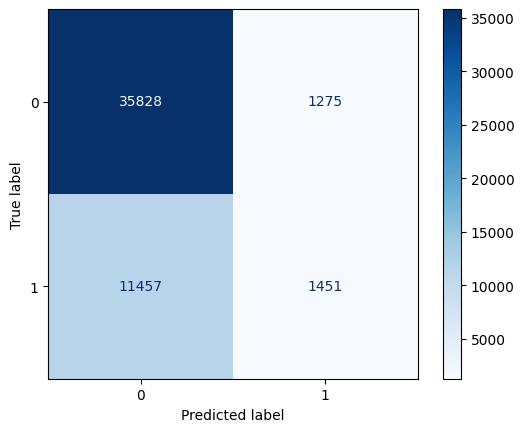

In [9]:
import pandas as pd
from flaml import AutoML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# AutoML 초기화 (로그 출력을 줄이기 위해 log_type 설정)
automl = AutoML(
    log_type="silent",
    metric='roc_auc',  # 최적화할 평가 지표
    time_budget=60*10,  # 학습에 사용할 최대 시간 (초)
    task="classification",  # 분류
    )

# 모델 학습
automl.fit(X_train=IVF_X_train, y_train=IVF_y_train)

# 최적의 모델 출력
print(automl.model.estimator)

# 예측
y_pred = automl.predict(IVF_X_test)
y_pred_proba = automl.predict_proba(IVF_X_test)[:, 1]

# 평가
accuracy = accuracy_score(IVF_y_test, y_pred)
f1 = f1_score(IVF_y_test, y_pred)
auc = roc_auc_score(IVF_y_test, y_pred_proba)
cm = confusion_matrix(IVF_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=automl.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

----

.